## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [16]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [18]:
df.head()


,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [19]:
df.tail()

,m,TagName,Unnamed: 2
2588,2024-02-01 00:00:00,php,1367
2589,2024-02-01 00:00:00,python,8114
2590,2024-02-01 00:00:00,r,1839
2591,2024-02-01 00:00:00,ruby,157
2592,2024-02-01 00:00:00,swift,688


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [20]:
print(f"shape results {df.shape}")

df.info()


shape results (2593, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   m           2593 non-null   object
 1   TagName     2593 non-null   object
 2   Unnamed: 2  2593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.9+ KB


In [21]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [22]:


#df.rename() function and refer the columns to be renamed. Not all the columns have to be renamed:

df = df.rename(columns={'m': 'Date', 'TagName': 'Tag', 'Unnamed: 2':'Posts'})


In [23]:
df.columns

Index(['Date', 'Tag', 'Posts'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [24]:
df.count()

Date     2593
Tag      2593
Posts    2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [25]:
df['Posts'].idxmax()

1959

In [26]:
df.loc[1959]

Date     2020-05-01 00:00:00
Tag                   python
Posts                  29374
Name: 1959, dtype: object

In [27]:
post_data = df.groupby('Tag').sum('Posts').sort_values('Posts', ascending=False)
print(post_data)

              Posts
Tag                
javascript  2523069
python      2182922
java        1913593
c#          1611877
php         1462582
c++          804918
r            503642
c            403021
swift        332515
ruby         228894
go            72402
perl          68045
delphi        51734
assembly      44036


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [28]:
month_data = df.groupby('Tag').nunique('Date').sort_values('Date', ascending=False)
print(month_data)

            Date  Posts
Tag                    
c#           188    185
assembly     187    146
c            187    178
c++          187    184
delphi       187    154
java         187    187
javascript   187    187
perl         187    169
php          187    185
python       187    187
ruby         187    177
r            185    178
swift        178    129
go           172    151


In [33]:
df.groupby('Tag').count().sort_values('Date', ascending=False)

,Date,Posts
Tag,,
c#,188,188
assembly,187,187
c,187,187
c++,187,187
delphi,187,187
java,187,187
javascript,187,187
perl,187,187
php,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [34]:
df["Date"] = pd.to_datetime(df["Date"])

In [35]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


In [36]:
df.tail()


,Date,Tag,Posts
2588,2024-02-01,php,1367
2589,2024-02-01,python,8114
2590,2024-02-01,r,1839
2591,2024-02-01,ruby,157
2592,2024-02-01,swift,688


## Data Manipulation



In [49]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,172.0,970.0,3184.0,1708.0,165.0,421.0,3418.0,5452.0,53.0,1538.0,8998.0,2063.0,193.0,901.0
2023-11-01,172.0,959.0,3109.0,1469.0,103.0,409.0,3275.0,5186.0,44.0,1399.0,8460.0,1994.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1429.0,75.0,326.0,2538.0,4772.0,53.0,1208.0,7002.0,1603.0,154.0,742.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [50]:
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2008-07-01 to 2024-02-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    187 non-null    float64
 1   c           187 non-null    float64
 2   c#          188 non-null    float64
 3   c++         187 non-null    float64
 4   delphi      187 non-null    float64
 5   go          172 non-null    float64
 6   java        187 non-null    float64
 7   javascript  187 non-null    float64
 8   perl        187 non-null    float64
 9   php         187 non-null    float64
 10  python      187 non-null    float64
 11  r           185 non-null    float64
 12  ruby        187 non-null    float64
 13  swift       178 non-null    float64
dtypes: float64(14)
memory usage: 22.0 KB


In [51]:
reshaped_df.shape

(188, 14)

In [54]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [56]:
reshaped_df.count()

Tag
assembly      187
c             187
c#            188
c++           187
delphi        187
go            172
java          187
javascript    187
perl          187
php           187
python        187
r             185
ruby          187
swift         178
dtype: int64

In [53]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [58]:
reshaped_df.fillna(0, inplace=True) 
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,172.0,970.0,3184.0,1708.0,165.0,421.0,3418.0,5452.0,53.0,1538.0,8998.0,2063.0,193.0,901.0
2023-11-01,172.0,959.0,3109.0,1469.0,103.0,409.0,3275.0,5186.0,44.0,1399.0,8460.0,1994.0,153.0,864.0
2023-12-01,181.0,876.0,2645.0,1429.0,75.0,326.0,2538.0,4772.0,53.0,1208.0,7002.0,1603.0,154.0,742.0


In [59]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [66]:
reshaped_df['c#']

Date
2008-07-01       3.0
2008-08-01     504.0
2008-09-01    1639.0
2008-10-01    1987.0
2008-11-01    1729.0
               ...  
2023-10-01    3184.0
2023-11-01    3109.0
2023-12-01    2645.0
2024-01-01    2692.0
2024-02-01    2808.0
Name: c#, Length: 188, dtype: float64

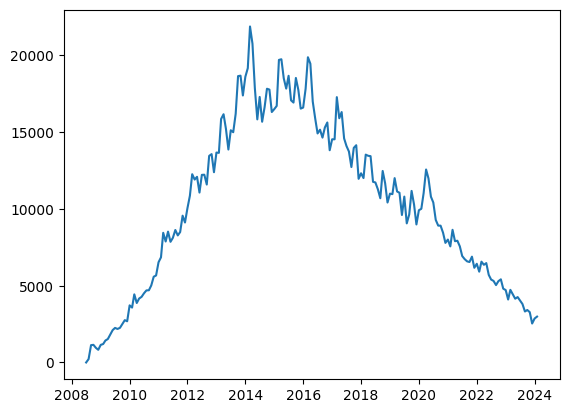

In [76]:
#plt.plot([0, 6], [0, 10])
#plt.plot(reshaped_df['javascript'])
#plt.plot(reshaped_df)
plt.plot(reshaped_df.index, reshaped_df.java)

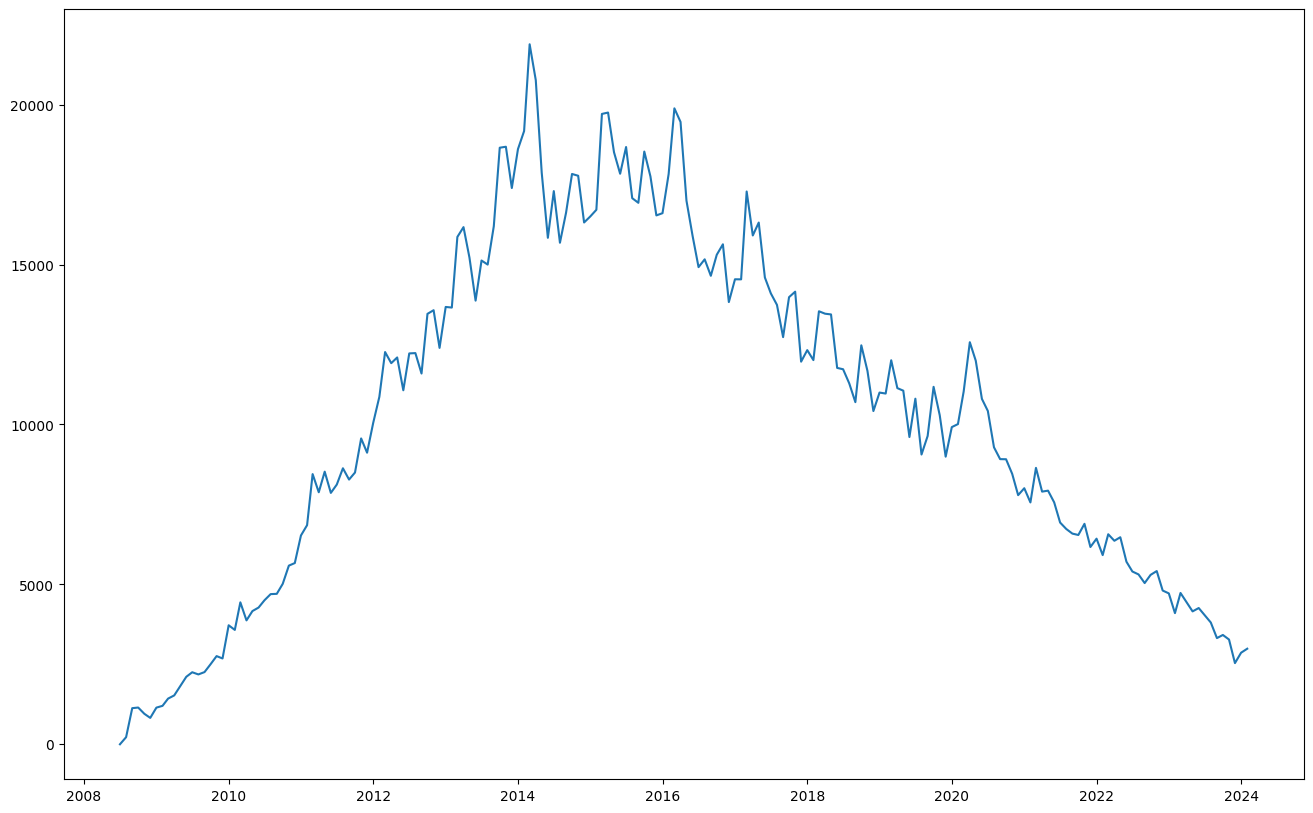

In [77]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

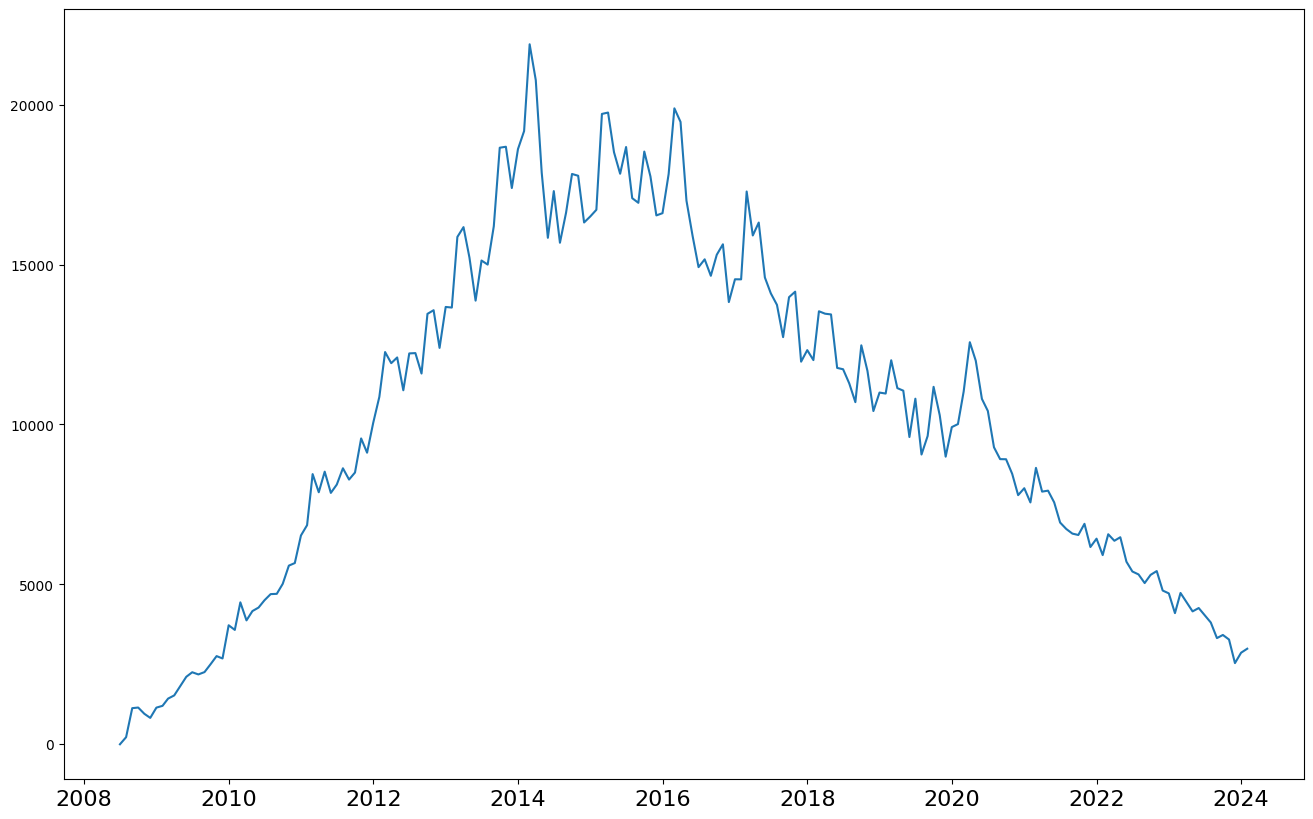

In [78]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=16)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

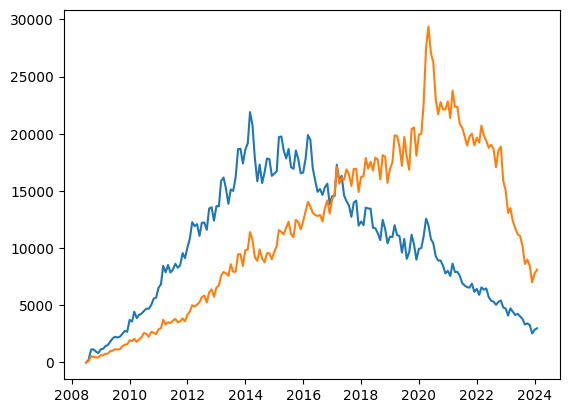

In [85]:
graph_me = pd.DataFrame({"java" : reshaped_df['java'], "python" : reshaped_df['python']})
#graph_me
plt.plot(graph_me)

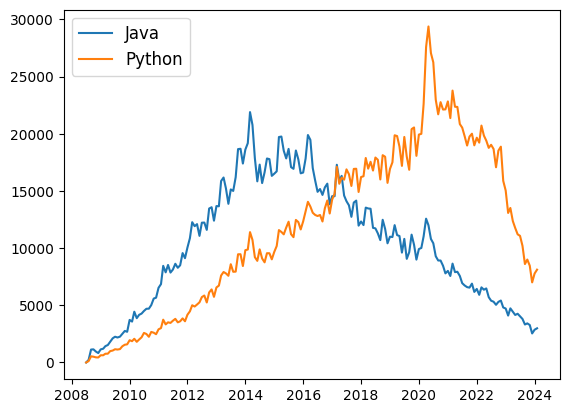

In [88]:
plt.plot(reshaped_df.index, reshaped_df.java, label="Java")
plt.plot(reshaped_df.index, reshaped_df.python, label="Python")
plt.legend(fontsize=12)

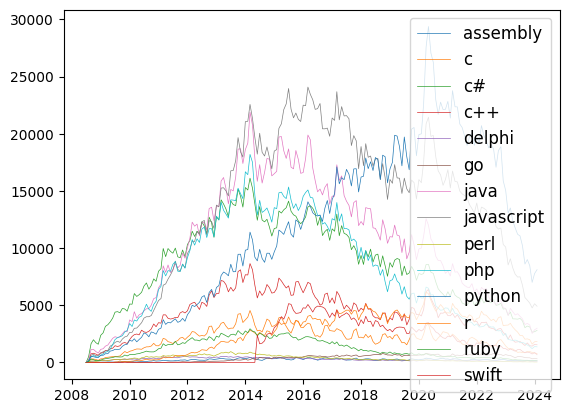

In [90]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=.5, label=reshaped_df[column].name)
 
plt.legend(fontsize=12) 

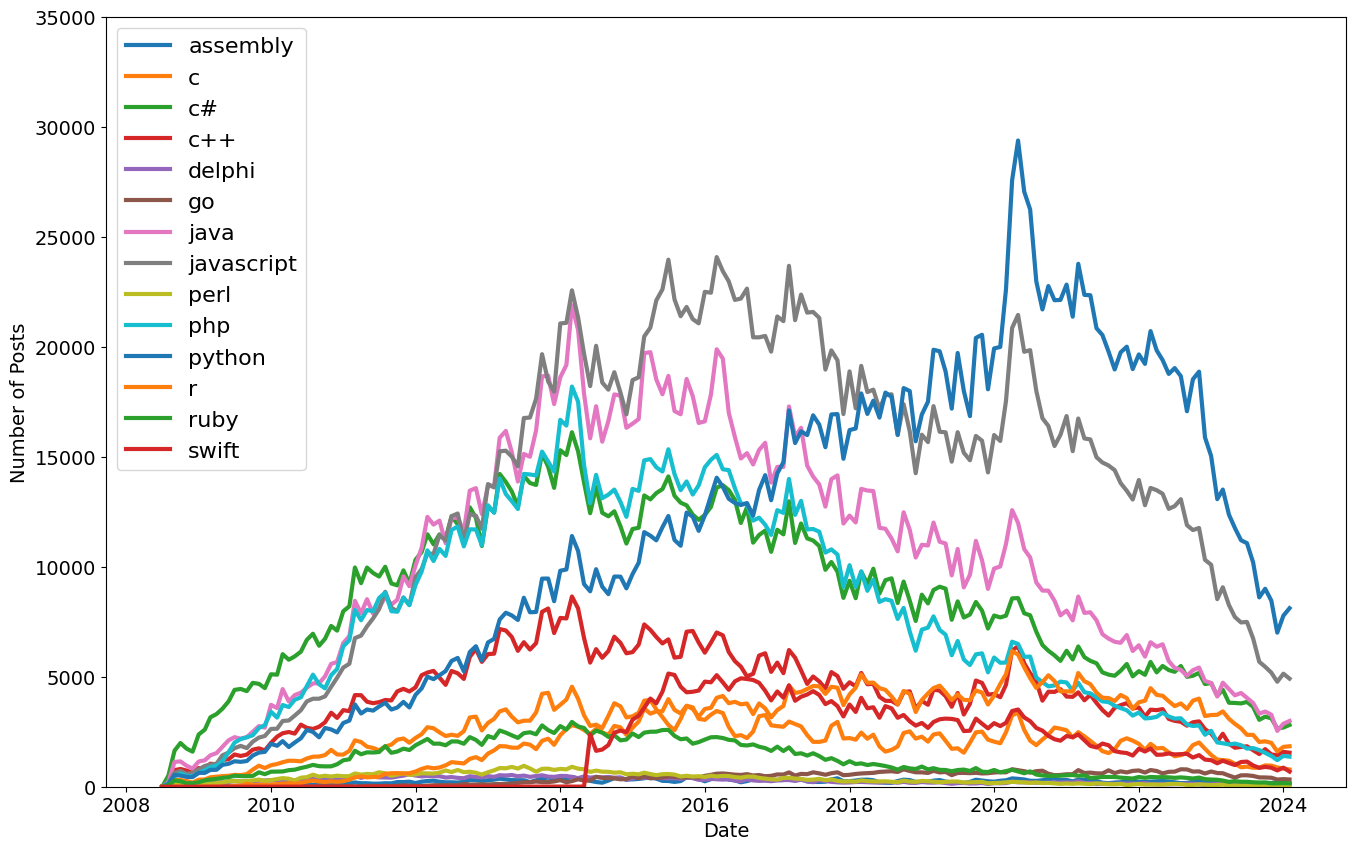

In [91]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

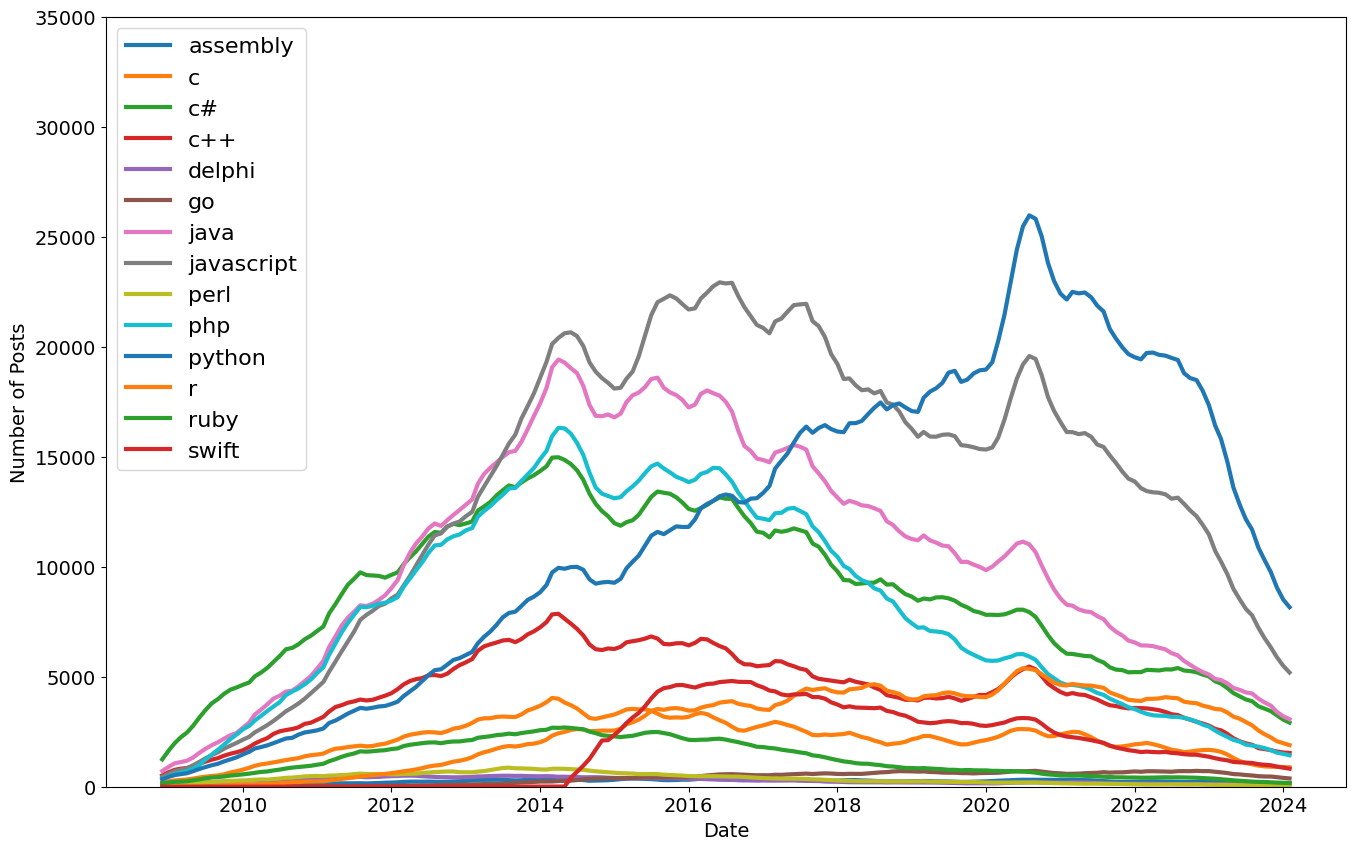

In [92]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)